In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
data = mpimg.imread('home.png')
data = data.reshape(1,data.shape[0], data.shape[1], data.shape[2])
print("Input data dimension ", data.shape)

Input data dimension  (1, 252, 362, 3)


(-0.5, 361.5, 251.5, -0.5)

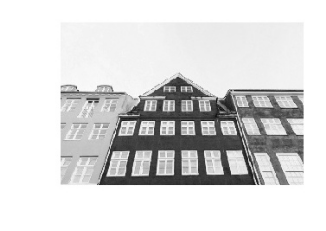

In [3]:
plt.imshow(data[0,:,:,:])
plt.grid(False)
plt.axis("off")

### zero padding
- parameters:
 
            data: the data on which padding is performed    
            pad:  the amount of padding around the data    
- returns: 
            data_padded 

In [4]:
def zero_pad(data, pad):
    data_padded = np.pad(array = data, pad_width = ((0,0),(pad,pad), (pad,pad), (0,0)), mode = 'constant', constant_values = 0)
    return data_padded
    

dimension before padding:  (1, 252, 362, 3)
dimension after padding:  (1, 272, 382, 3)


(-0.5, 381.5, 271.5, -0.5)

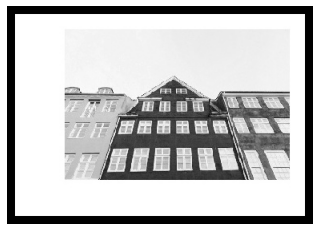

In [5]:
print("dimension before padding: ", data.shape)
img_pad = zero_pad(data, 10)
print("dimension after padding: ", img_pad.shape)

plt.imshow(img_pad[0,:,:,:], cmap = "gray")
plt.grid(False)
plt.axis("off")

### Convolution single step  
- parameter:  
         - data_slice: the receptive field over which convolution is performed  
         - W: the filter used for convolution  
- returns:
         - Z: convolved output over the receptive field

In [6]:
def conv_single_step(data_slice, W):
    conv = np.multiply(data_slice, W)
    Z = np.sum(conv) 
    
    return Z

In [7]:
def convolution(image, W, hparams):
    stride = hparams["stride"]
    pad = hparams["pad"]
 
    m, h_img, w_img, c_img = image.shape
   
    f, f, c, n_c = W.shape
  
    n_h = int((h_img - f + 2*pad)/stride) + 1
    n_w = int((w_img - f + 2*pad)/stride) + 1
  
    Z = np.zeros((m, n_h, n_w, n_c))
    image_pad = zero_pad(image, pad)
    for i in range(m):
        for h in range(n_h):
            for w in range(n_w):
                for c in range(n_c):
                    w_start = w * stride
                    w_end = w_start + f 
                    h_start = h * stride
                    h_end = h_start + f
        
                    Z[i,h,w,c] = conv_single_step(image_pad[i, h_start:h_end, w_start:w_end, :], W[:,:,:,c])
    return Z

In [8]:
#Define a dictionary hparams with stride = 1 and pad = 0
hparams = {"pad" : 0, "stride": 1}

dimension of image before convolution:  (1, 252, 362, 3)
dimension of image after convolution:  (1, 250, 360, 1)


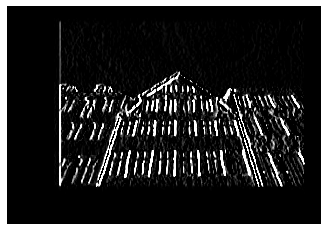

In [9]:
#Get vertical edges
vertical_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]]).reshape(3,3,1,1)

Z1 = convolution(data, vertical_filter, hparams)
plt.clf()
plt.imshow(Z1[0,:,:,0], cmap='gray',vmin=0, vmax=1)
plt.grid(False)
plt.axis("off")
print("dimension of image before convolution: ", data.shape)
print("dimension of image after convolution: ", Z1.shape)

dimension of image before convolution:  (1, 252, 362, 3)
dimension of image after convolution:  (1, 250, 360, 1)


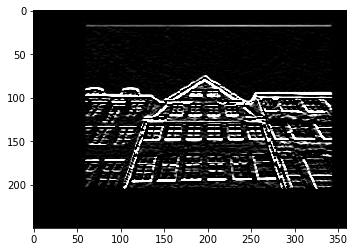

In [10]:
#Get horizontal edges
horizontal_filter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]).reshape((3,3,1,1))
Z2 = convolution(data, horizontal_filter, hparams)
plt.clf()
plt.imshow(Z2[0,:,:,0], cmap='gray',vmin=0, vmax=1)
plt.grid(False)

print("dimension of image before convolution: ", data.shape)
print("dimension of image after convolution: ", Z2.shape)

dimension of image before convolution:  (1, 252, 362, 3)
dimension of image after convolution:  (1, 250, 360, 1)


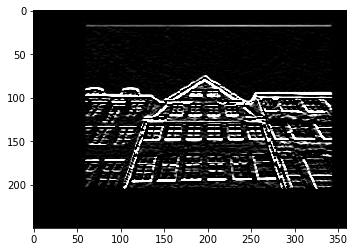

In [11]:
#Get horizontal + vertical edges
edges_filter = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]).reshape((3,3,1,1))
Z3 = convolution(data, horizontal_filter, hparams)
plt.clf()
plt.imshow(Z3[0,:,:,0], cmap='gray',vmin=0, vmax=1)
plt.grid(False)

print("dimension of image before convolution: ", data.shape)
print("dimension of image after convolution: ", Z3.shape)

dimension of image before convolution:  (1, 252, 362, 3)
dimension of image after convolution:  (1, 250, 360, 1)


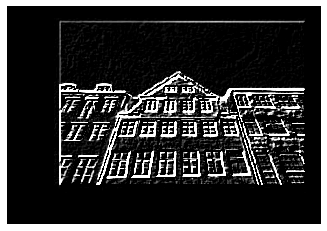

In [12]:
#OR simply add the two images
Z4 = Z1 + Z2
plt.clf()
plt.imshow(Z4[0,:,:,0], cmap='gray',vmin=0, vmax=1)
plt.grid(False)
plt.axis("off")
print("dimension of image before convolution: ", data.shape)
print("dimension of image after convolution: ", Z4.shape)